
# **Abstract**

# **Titulo**

“Análisis de la Participación Cultural y Actividades en Argentina: Perspectivas de la Encuesta Nacional de Consumos Culturales 2017”

# **Datos del Alumno**

Alumno:    Serfio Fernando Navarro
Comisión:  61675
Curson:    Data Science I: Fundamentos para la Ciencia de Datos

# Antecedentes

Entiendo me es importante traer la conclusión del trabajo final del curso anterior “Data Analytics”:



“El Dashboard permite confirmar la cantidad de pasajeros y los lugares de interés en las distintas provincias. Sin embargo, sería beneficioso ampliar y desarrollar más páginas que muestren la evolución de los viajeros por provincia a lo largo del tiempo. Este tipo de gráficos de tendencias estacionales o comparativas de afluencia en distintos destinos puede ayudarnos a identificar oportunidades de inversión y desarrollo cultural.
Además, sería importante realizar encuestas a nivel nacional a todos los viajeros para identificar sus preferencias en cuanto a lugares de interés y si realmente utilizan las instalaciones disponibles o si las conocen. Esto permitirá desarrollar estrategias de distribución y difusión cultural en cada lugar.”


A fin de explicar el porqué de mi elección el dataset en esta ocasión justamente forma parte de mis recomendaciones de pasos a seguir cumplimentando el Análisis anterior.

# Objetivos

Este estudio tiene como objetivo explorar la relación entre la distribución y características de los espacios culturales en Argentina y el volumen de turismo interno y externo. La hipótesis inicial postula que la existencia y variedad de espacios culturales en una localidad se correlacionan positivamente con el volumen de turismo que recibe. Esta hipótesis se pone a prueba utilizando datos de diversas fuentes, entre ellas la Encuesta Nacional de Consumo Cultural 2017.
# Hipótesis
La hipótesis que impulsa este análisis es que niveles más altos de participación en actividades culturales y redes sociales están asociados con un mayor conocimiento y compromiso cultural entre la población argentina. Además, se plantea que factores demográficos como la edad, el género y la región influyen significativamente en los niveles de participación.


# Usuario Final del Proyecto

Esta pensado que tanto la secretaria de Cultura com ola Secretaria de turismo serian posibles interesados de este estudio asi como tambien
distintos agentes, comerciantes en el area de turismo para saber sectorizar o enfocar mas certeramente sus esfuerzos , marketing etc.
Luego del analisis de los resltados obtenidos puedo decir tambien que estos resultados podrían interesar a empresas de tecnología y medios digitales, investigadores de comportamiento digital y bienestar social, y departamentos de recursos humanos, quienes buscan comprender los patrones de consumo digital y su interacción con otras actividades

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Monto el drive de Google para cargar mi DataSet

In [3]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/Colab Notebooks/encc_2017.csv'
df = pd.read_csv(file_path)

<ipython-input-3-4203cfcfbea8>:4: DtypeWarning: Columns (0,30,106,107,144,145,299,349,350,385) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)




*   Importo librerias
*   indico ubicacion del csv en el Drive
*   guardo en df el csv





In [4]:
df.head()

,id,pondera_dem,fecha,region,sexo,edad,p1,p1otros,p2,p2_1,...,horas_tv_total,minutos_internet_1,minutos_internet_total,horas_internet_total,minutos_redes_1,minutos_redes_total,horas_redes_total,minutos_videojuegos_1,minutos_videojuegos_total,horas_videojuegos_total
0,1,8608,23/5/2017,CENTRO,Varón,19,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,1.00,480.0,480.0,8.0,240.0,240.0,4.0,60.0,60.0,1.0
1,2,2869,10/5/2017,CENTRO,Varón,24,"EL ARTE, LO CULTO",,SI,NaN,...,0.75,120.0,120.0,2.0,60.0,60.0,1.0,0.0,0.0,0.0
2,3,8765,22/5/2017,CENTRO,Varón,30,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,0.50,420.0,420.0,7.0,120.0,120.0,2.0,0.0,0.0,0.0
3,4,12838,9/5/2017,CENTRO,Varón,53,MUSICA,,SI,NaN,...,1.00,360.0,360.0,6.0,300.0,300.0,5.0,0.0,0.0,0.0
4,5,20223,22/5/2017,CENTRO,Varón,70,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,4.00,240.0,240.0,4.0,120.0,120.0,2.0,0.0,0.0,0.0



 # Lista de las columnas que queremos analizar

 A continuación seleccionare las columnas de interes

In [5]:

Columnas_xAnalizar = [
    'region', 'sexo', 'edad', 'p1','p1otros','p45', 'p45_bis', 'p47_1a', 'p47_1b', 'p47_1c', 'p47_1d',
    'p48_1', 'p48_2', 'p48_3', 'p48_4', 'p48_5', 'p48_6', 'p48_7',
    'p48_8', 'p48_9', 'p48_10', 'p48_11', 'p48_12', 'p48_13',
    'p48_14', 'p48_15', 'p48_16'
]

In [6]:

# Filtrar el dataframe para incluir solo las columnas de interés
df_filtrado= df[Columnas_xAnalizar]  # Crea un nuevo DataFrame con solo las columnas seleccionadas

In [7]:
# Mostrar información básica sobre el dataset filtrado
print("Información del Dataset Filtrado:")  # Imprime un título para la información del DataFrame
print(df_filtrado.info())  # Muestra información sobre el DataFrame, como el número de entradas y tipos de datos

Información del Dataset Filtrado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   2800 non-null   object
 1   sexo     2802 non-null   object
 2   edad     2802 non-null   object
 3   p1       2802 non-null   object
 4   p1otros  2802 non-null   object
 5   p45      1359 non-null   object
 6   p45_bis  2800 non-null   object
 7   p47_1a   320 non-null    object
 8   p47_1b   47 non-null     object
 9   p47_1c   10 non-null     object
 10  p47_1d   1 non-null      object
 11  p48_1    1359 non-null   object
 12  p48_2    1359 non-null   object
 13  p48_3    1359 non-null   object
 14  p48_4    1359 non-null   object
 15  p48_5    1359 non-null   object
 16  p48_6    1359 non-null   object
 17  p48_7    1359 non-null   object
 18  p48_8    1359 non-null   object
 19  p48_9    1359 non-null   object
 20  p48_10   1359 non-null   object
 21  p48

Podemos ver las columas del subset de datos seleccionados para analizar luego tras ver los datos del mismo se tomaran decisiones para poder completar nulos, descartar valores, etc.

In [8]:
df_filtrado.head()


,region,sexo,edad,p1,p1otros,p45,p45_bis,p47_1a,p47_1b,p47_1c,...,p48_7,p48_8,p48_9,p48_10,p48_11,p48_12,p48_13,p48_14,p48_15,p48_16
0,CENTRO,Varón,19,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,NaN,NaN,NaN,...,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,HABITUALMENTE,NUNCA,NUNCA,NUNCA
1,CENTRO,Varón,24,"EL ARTE, LO CULTO",,0,0,COMPUTADORA,NaN,NaN,...,NUNCA,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,CASI NUNCA,NUNCA,NUNCA,CASI NUNCA,NUNCA
2,CENTRO,Varón,30,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,CELULAR,NaN,NaN,...,NUNCA,HABITUALMENTE,NUNCA,NUNCA,NUNCA,HABITUALMENTE,HABITUALMENTE,NUNCA,NUNCA,NUNCA
3,CENTRO,Varón,53,MUSICA,,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CENTRO,Varón,70,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,NaN,NaN,NaN,...,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA


In [9]:
df_filtrado.describe()

,region,sexo,edad,p1,p1otros,p45,p45_bis,p47_1a,p47_1b,p47_1c,...,p48_7,p48_8,p48_9,p48_10,p48_11,p48_12,p48_13,p48_14,p48_15,p48_16
count,2800,2802,2802,2802,2802,1359,2800,320,47,10,...,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
unique,7,3,82,15,69,24,24,5,3,2,...,5,5,5,5,5,5,5,5,5,5
top,CENTRO,Mujer,19,"HABITOS, COSTUMBRES, COMPORTAMIENTOS",,0,0,COMPUTADORA,COMPUTADORA,COMPUTADORA,...,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA,NUNCA
freq,400,1403,131,632,2729,506,1947,169,29,7,...,1168,827,1055,1091,1011,567,918,890,965,1016


"""Asigna un grupo de edad basado en la edad proporcionada."""

In [10]:
def assign_age_group(age):

    try:
        age = int(age)  # Intenta convertir la edad a un entero
        if 0 <= age <= 18:
            return '0-18'
        elif 19 <= age <= 30:
            return '19-30'
        elif 31 <= age <= 45:
            return '31-45'
        elif 46 <= age <= 60:
            return '46-60'
        elif age > 60:
            return '60+'
        else:
            return None  # Para edades inválidas (negativas)
    except ValueError:
        return None  # Para valores no numéricos

# Aplicar la función a la columna 'edad' para crear la columna 'grupo_edad'
df_filtrado['grupo_edad'] = df_filtrado['edad'].apply(assign_age_group)

<ipython-input-10-9d354a768aa2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['grupo_edad'] = df_filtrado['edad'].apply(assign_age_group)


se vuelve a ver la el dataset para ver la nuevo columna que establece rango de edades

In [11]:
df_filtrado.head()

,region,sexo,edad,p1,p1otros,p45,p45_bis,p47_1a,p47_1b,p47_1c,...,p48_8,p48_9,p48_10,p48_11,p48_12,p48_13,p48_14,p48_15,p48_16,grupo_edad
0,CENTRO,Varón,19,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,NaN,NaN,NaN,...,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,HABITUALMENTE,NUNCA,NUNCA,NUNCA,19-30
1,CENTRO,Varón,24,"EL ARTE, LO CULTO",,0,0,COMPUTADORA,NaN,NaN,...,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,CASI NUNCA,NUNCA,NUNCA,CASI NUNCA,NUNCA,19-30
2,CENTRO,Varón,30,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,CELULAR,NaN,NaN,...,HABITUALMENTE,NUNCA,NUNCA,NUNCA,HABITUALMENTE,HABITUALMENTE,NUNCA,NUNCA,NUNCA,19-30
3,CENTRO,Varón,53,MUSICA,,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-60
4,CENTRO,Varón,70,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,1,1,NaN,NaN,NaN,...,NUNCA,NUNCA,NUNCA,NUNCA,DE VEZ EN CUANDO,DE VEZ EN CUANDO,NUNCA,NUNCA,NUNCA,60+


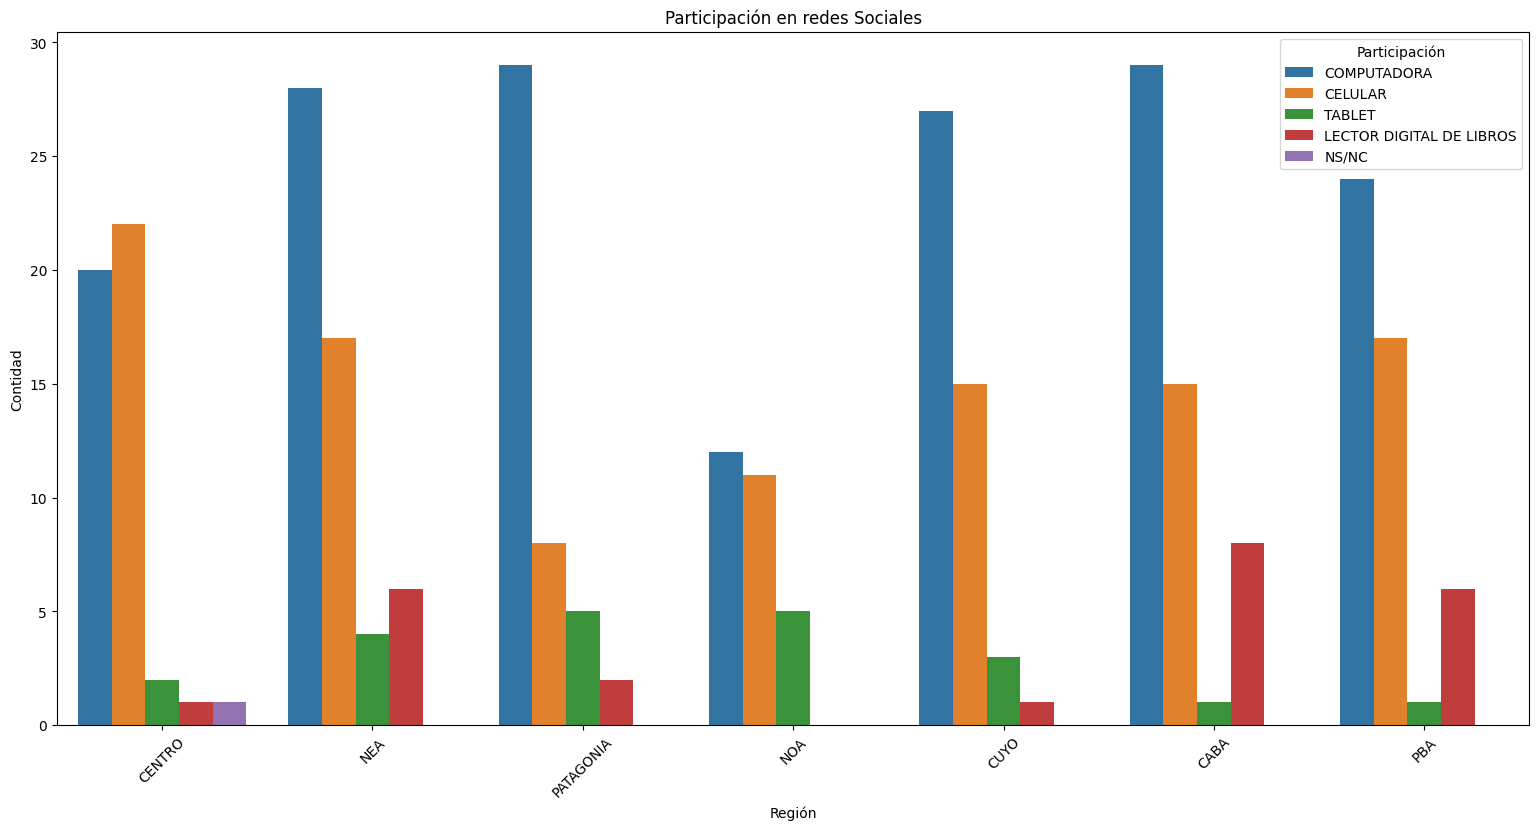

In [12]:
import seaborn as sns  # Importa la librería Seaborn para visualización de datos
import matplotlib.pyplot as plt  # Importa Matplotlib para visualización de datos

# Gráfico de barras  de participación en actividades culturales por región
plt.figure(figsize=(19, 9))  # Crea una figura de tamaño 12x6 pulgadas
sns.countplot(data=df_filtrado, x='region', hue='p47_1a')  # Crea un gráfico de barras con Seaborn
# data=df_filtered: usa el DataFrame filtrado
# x='region': la variable en el eje x es la región
# hue='p47_1a': las barras se dividen por la participación en Redes sociales

plt.title('Participación en redes Sociales')  # Añade un título al gráfico
plt.xlabel('Región')  # Etiqueta el eje x
plt.ylabel('Contidad')  # Etiqueta el eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x 45 grados para mejor legibilidad
plt.legend(title='Participación')  # Añade una leyenda con el título 'Participación'
plt.show()  # Muestra el gráfico

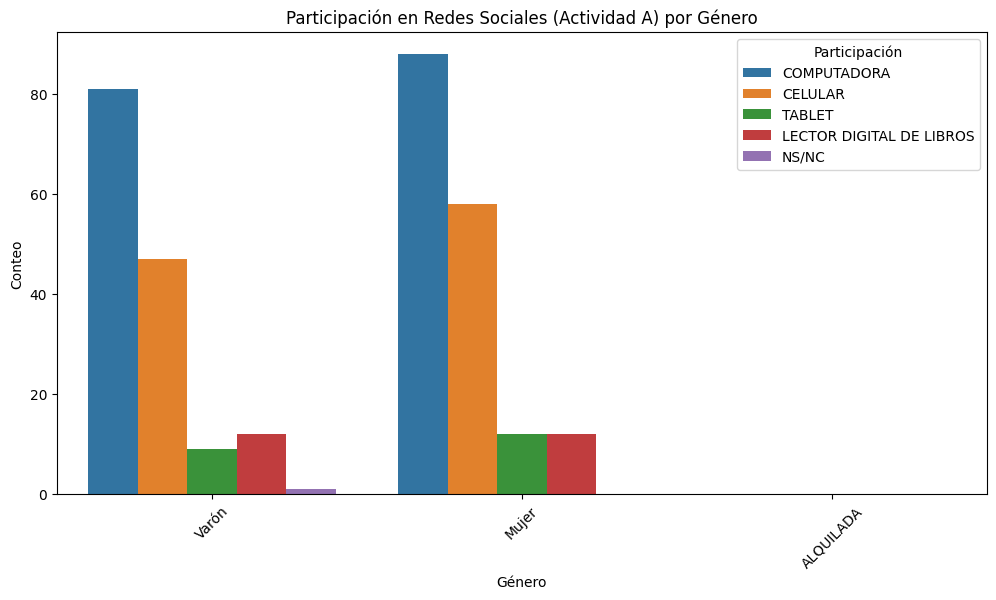

In [13]:
# Gráfico de conteo de participación en redes sociales por género
plt.figure(figsize=(12, 6))  # Crea una figura de tamaño 12x6 pulgadas
sns.countplot(data=df_filtrado, x='sexo', hue='p47_1a')  # Crea un gráfico de barras con Seaborn
# data=df_filtered: usa el DataFrame filtrado
# x='sexo': la variable en el eje x es el género
# hue='p47_1a': las barras se dividen por la participación en la actividad A de redes sociales

plt.title('Participación en Redes Sociales (Actividad A) por Género')  # Añade un título al gráfico
plt.xlabel('Género')  # Etiqueta el eje x
plt.ylabel('Conteo')  # Etiqueta el eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x 45 grados para mejor legibilidad
plt.legend(title='Participación')  # Añade una leyenda con el título 'Participación'
plt.show()  # Muestra el gráfico

Text(0.5, 1.0, 'Participación en Actividades Culturales por Grupo de Edad')

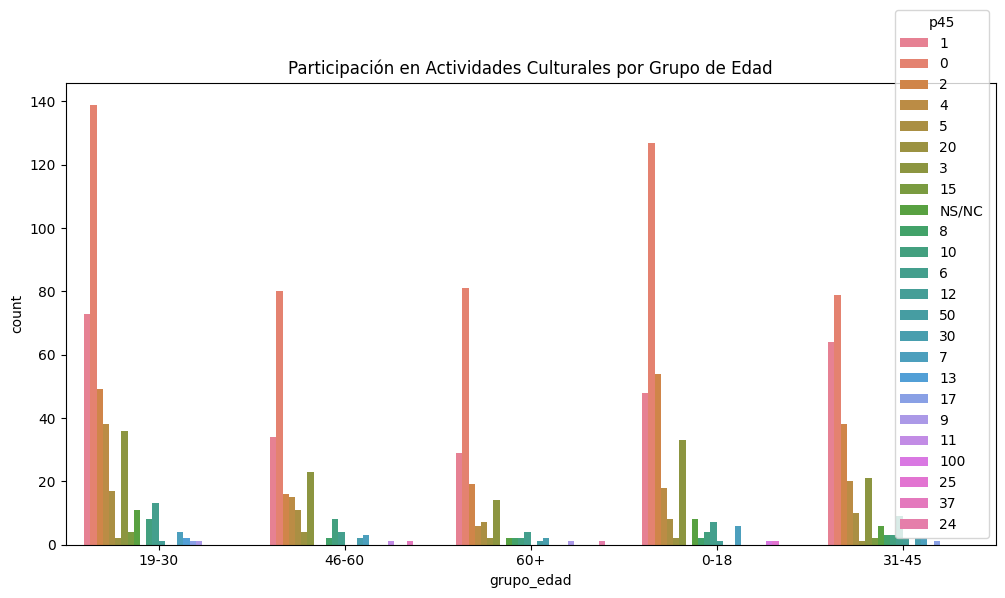

In [14]:
import matplotlib.pyplot as plt  # Importa Matplotlib para visualización de datos

# Gráfico de conteo de participación en actividades culturales por grupo de edad
plt.figure(figsize=(12, 6))  # Crea una figura de tamaño 12x6 pulgadas
sns.countplot(data=df_filtrado, x='grupo_edad', hue='p45')  # Crea un gráfico de barras con Seaborn
# data=df_filtered: usa el DataFrame filtrado
# x='grupo_edad': la variable en el eje x es el grupo de edad
# hue='p45': las barras se dividen por la participación en actividades culturales

plt.title('Participación en Actividades Culturales por Grupo de Edad')  # Añade un título al gráfico

A fin de analizar la influencia del uso de interntet y las redes sociales en el uso o desarrollo de una actividad cultuiral analizaremos distintas metricas de ese uso y ver cual de ellas tiene una relacion ddirecta con el desarrolo de actividades culturales y turismo



#  DICCIONARIO DE DATOS

| Columna                  | Descripción                                                                                       |

|--------------------------|---------------------------------------------------------------------------------------------------|

| `id`                     | Identificador único de cada encuestado.                                                           |

| `pondera_dem`            | Factor de ponderación para ajustar la representatividad de la muestra.                            |

| `region`                 | Región geográfica del encuestado.                                                                 |

| `sexo`                   | Género del encuestado (por ejemplo: masculino, femenino).                                         |

| `edad`                   | Edad del encuestado en años.                                                                      |

| `p1`, `p2`, `p3`, ...    | Respuestas a diversas preguntas de la encuesta relacionadas con actividades y consumo digital.    |

| `minutos_internet_total` | Tiempo total (en minutos) dedicado al uso de internet por el encuestado.                          |

| `horas_tv_total`         | Tiempo total (en horas) dedicado a ver televisión.                                                |

| `horas_internet_total`   | Tiempo total (en horas) dedicado a actividades en internet (excluida en algunos análisis).        |

| `p80minutos`, `p12minutos`, `p31minutos` | Tiempo (en minutos) dedicado a actividades específicas (como redes sociales o música). |

| `p80horas`, `p12horas`   | Tiempo (en horas) dedicado a actividades acumulativas o complementarias.                          |

| `minutos_radio`          | Tiempo (en minutos) dedicado a escuchar radio.                                                    |

| `minutos_redes`          | Tiempo (en minutos) dedicado a redes sociales.                                                    |

| `p76horas`               | Tiempo (en horas) dedicado a una actividad específica (excluida en algunos análisis).             |

Este diccionario de datos proporciona una descripción general de las principales variables en el dataset, con especial enfoque en aquellas relacionadas con el tiempo dedicado a internet y otras actividades digitales.


In [25]:
# 9 - EDA - ANÁLISIS EXPLORATIORIO DE LOS DATOS
print("Primeras filas del dataset:")
display(df.head())

# INFORMACIÓN GENERAL DEL DATASET
print("\nInformación general del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

# COMPROBACIÓN DE VALORES NULOS
print("\nCantidad de valores nulos por columna:")
display(df.isnull().sum())




Primeras filas del dataset:


,id,pondera_dem,fecha,region,sexo,edad,p1,p1otros,p2,p2_1,...,horas_tv_total,minutos_internet_1,minutos_internet_total,horas_internet_total,minutos_redes_1,minutos_redes_total,horas_redes_total,minutos_videojuegos_1,minutos_videojuegos_total,horas_videojuegos_total
0,1,8608,23/5/2017,CENTRO,Varón,19,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,1.00,480.0,480.0,8.0,240.0,240.0,4.0,60.0,60.0,1.0
1,2,2869,10/5/2017,CENTRO,Varón,24,"EL ARTE, LO CULTO",,SI,NaN,...,0.75,120.0,120.0,2.0,60.0,60.0,1.0,0.0,0.0,0.0
2,3,8765,22/5/2017,CENTRO,Varón,30,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,0.50,420.0,420.0,7.0,120.0,120.0,2.0,0.0,0.0,0.0
3,4,12838,9/5/2017,CENTRO,Varón,53,MUSICA,,SI,NaN,...,1.00,360.0,360.0,6.0,300.0,300.0,5.0,0.0,0.0,0.0
4,5,20223,22/5/2017,CENTRO,Varón,70,"LA FORMA DE PENSAR, IDEOLOGIA, VALORES",,SI,NaN,...,4.00,240.0,240.0,4.0,120.0,120.0,2.0,0.0,0.0,0.0



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Columns: 450 entries, id to horas_videojuegos_total
dtypes: float64(48), int64(2), object(400)
memory usage: 9.6+ MB

Estadísticas descriptivas:


,id,pondera_dem,fecha,region,sexo,edad,p1,p1otros,p2,p2_1,...,horas_tv_total,minutos_internet_1,minutos_internet_total,horas_internet_total,minutos_redes_1,minutos_redes_total,horas_redes_total,minutos_videojuegos_1,minutos_videojuegos_total,horas_videojuegos_total
count,2801,2802,2802,2800,2802,2802,2802,2802,2802,881,...,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.00000,2798.000000,2798.000000,2798.000000,2798.000000
unique,2801,2455,70,7,3,82,15,69,2,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,4174,17/5/2017,CENTRO,Mujer,19,"HABITOS, COSTUMBRES, COMPORTAMIENTOS",,SI,PORQUE NO LE GUSTA LA RADIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,138,400,1403,131,632,2729,1927,316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.965630,240.407434,242.619371,4.043656,135.546819,140.17441,2.336240,24.403145,26.188349,0.436472
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.204794,292.874706,291.918119,4.865302,234.518588,233.22356,3.887059,67.301405,68.045453,1.134091
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,60.000000,60.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.500000,120.000000,150.000000,2.500000,60.000000,60.00000,1.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,300.000000,300.000000,5.000000,180.000000,180.00000,3.000000,0.000000,0.000000,0.000000



Cantidad de valores nulos por columna:


,0
id,1
pondera_dem,0
fecha,0
region,2
sexo,0
...,...
minutos_redes_total,4
horas_redes_total,4
minutos_videojuegos_1,4
minutos_videojuegos_total,4


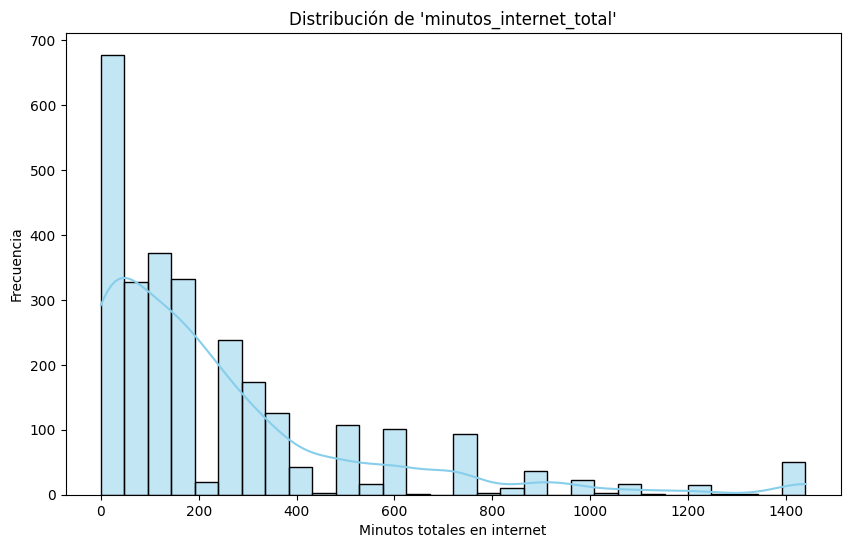

In [26]:
# Distribución del Tiempo en Internet

plt.figure(figsize=(10, 6))
sns.histplot(df['minutos_internet_total'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribución de 'minutos_internet_total'")
plt.xlabel("Minutos totales en internet")
plt.ylabel("Frecuencia")
plt.show()

La gráfica de **Distribución de `minutos_internet_total` por Género** muestra la variación en el tiempo total en internet entre hombres y mujeres. En general, ambos géneros presentan una mediana similar de uso de internet, lo cual sugiere que no hay una diferencia significativa en el tiempo de conexión promedio entre hombres y mujeres. Sin embargo, la presencia de valores atípicos en ambos grupos indica que hay individuos en ambos géneros que dedican un tiempo considerablemente mayor a internet, sobrepasando los 1000 minutos.

Este boxplot indica que el tiempo de uso de internet tiene una distribución amplia en ambos géneros, pero en términos generales, el comportamiento central (mediana) es muy parecido.

<ipython-input-27-164d929f0043>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='minutos_internet_total', data=df, palette="viridis")


Text(0, 0.5, 'Minutos totales en internet')

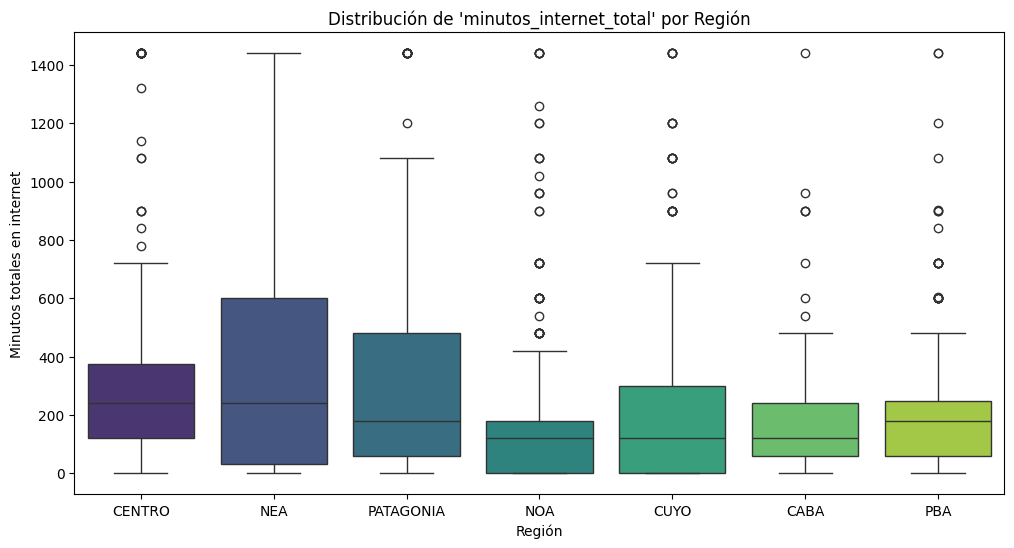

In [27]:
# Boxplot por Región

plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='minutos_internet_total', data=df, palette="viridis")
plt.title("Distribución de 'minutos_internet_total' por Región")
plt.xlabel("Región")
plt.ylabel("Minutos totales en internet")

La gráfica de **Distribución de `minutos_internet_total` por Región** muestra cómo varía el tiempo total en internet entre las diferentes regiones. Observamos que las regiones **NEA** y **Patagonia** presentan medianas más altas de tiempo de uso de internet en comparación con otras regiones, lo que sugiere que los habitantes de estas áreas dedican más tiempo a actividades en línea. Por otro lado, regiones como **CABA** y **PBA** tienen medianas más bajas, lo cual indica un menor tiempo promedio de uso de internet.

Además, en todas las regiones se observan valores atípicos, indicando que hay individuos que dedican una cantidad significativamente mayor de tiempo en internet, superando los 1000 minutos. Esto sugiere una variabilidad considerable dentro de cada región en cuanto al tiempo dedicado a internet, aunque el comportamiento central varía entre ellas.

<ipython-input-28-b7ebafbd852a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='minutos_internet_total', data=df, palette="pastel")


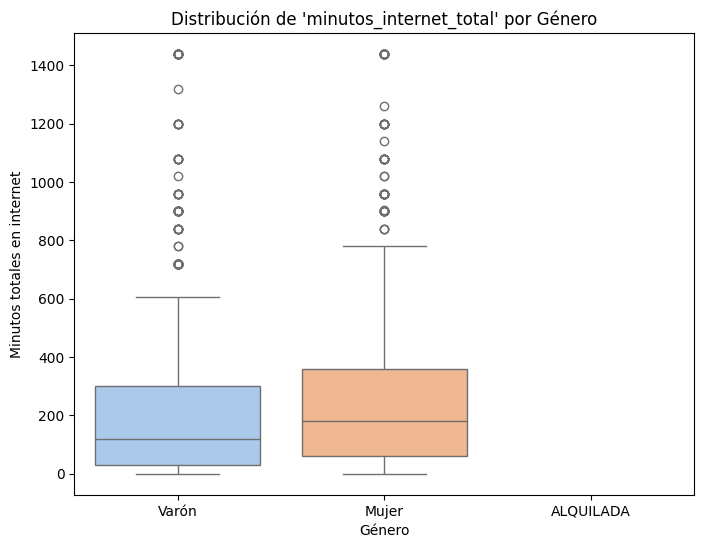

In [28]:
# Boxplot Comparativo por Género y por Región

# Boxplot por Género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sexo', y='minutos_internet_total', data=df, palette="pastel")
plt.title("Distribución de 'minutos_internet_total' por Género")
plt.xlabel("Género")
plt.ylabel("Minutos totales en internet")
plt.show()

La gráfica de **Distribución de `minutos_internet_total` por Género** muestra la variación en el tiempo total en internet entre hombres y mujeres. En general, ambos géneros presentan una mediana similar de uso de internet, lo cual sugiere que no hay una diferencia significativa en el tiempo de conexión promedio entre hombres y mujeres. Sin embargo, la presencia de valores atípicos en ambos grupos indica que hay individuos en ambos géneros que dedican un tiempo considerablemente mayor a internet, sobrepasando los 1000 minutos.

Este boxplot indica que el tiempo de uso de internet tiene una distribución amplia en ambos géneros, pero en términos generales, el comportamiento central (mediana) es muy parecido.

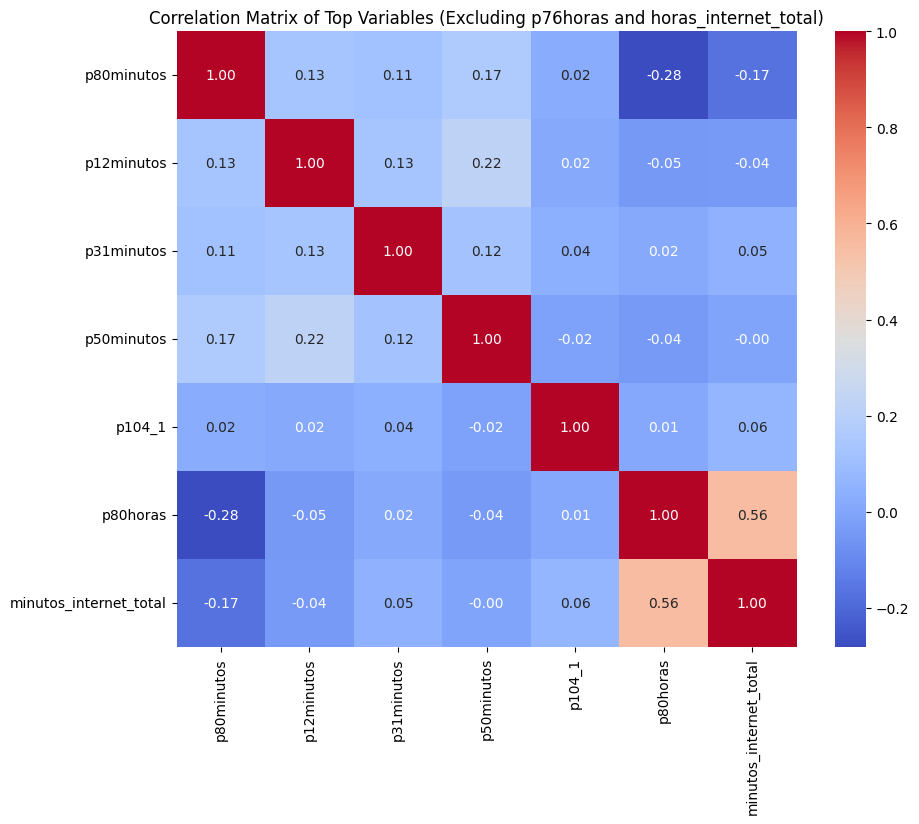

In [15]:

# Eliminar filas con valores nulos en 'minutos_internet_total' y excluir 'horas_internet_total' y 'p76horas' los excluyo porque en la encuesta poner 0 a cualquier medicion de uso de internet en realidad significaba que no usaban interntet ni redes sociales
target = 'minutos_internet_total'
df_cleaned = df.dropna(subset=[target])
df_cleaned = df_cleaned.drop(columns=['horas_internet_total', 'p76horas'], errors='ignore')

# Seleccionar las variables de interés para la matriz de correlación, la seleccion que hago es para
top_variables_updated = ['p80minutos', 'p12minutos', 'p31minutos', 'p50minutos', 'p104_1', 'p80horas', 'minutos_internet_total']
correlation_matrix_updated = df_cleaned[top_variables_updated].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Variables (Excluding p76horas and horas_internet_total)')
plt.show()

en este grafico

Top 10 variables seleccionadas con sus índices de correlación:
horas_internet: 1.000
p80minutos: -0.170
p12minutos: -0.038
p31minutos: 0.046
p50minutos: -0.004
p104_1: 0.063
p80horas: 0.557
p31horas: -0.064
p6minutos: 0.045
p12horas: 0.200


<ipython-input-16-cbd9f2f4b40c>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")


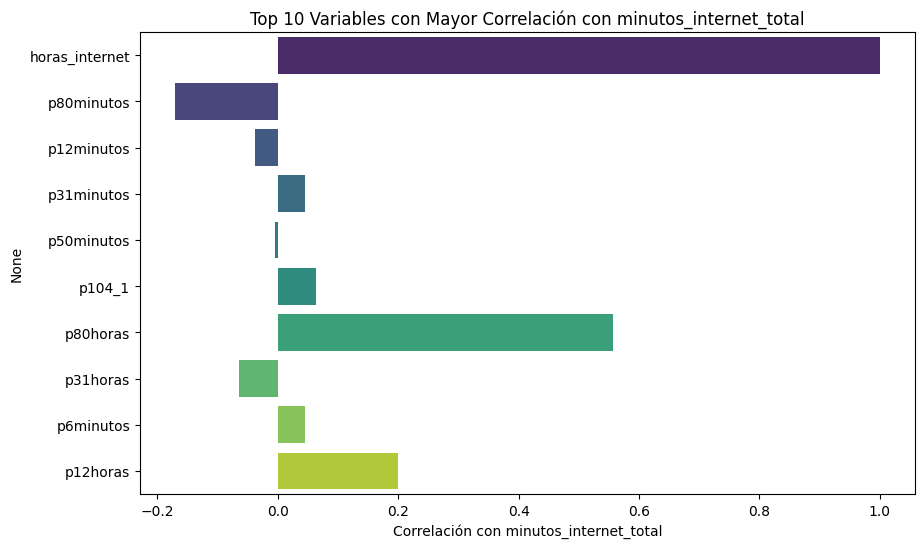

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Eliminar filas con valores nulos en 'minutos_internet_total' y excluir 'horas_internet_total' y 'p76horas'
target = 'minutos_internet_total'
data_cleaned = df.dropna(subset=[target])
X = data_cleaned.drop(columns=[target, 'horas_internet_total', 'p76horas'])
y = data_cleaned[target]

# Seleccionar solo las variables numéricas
X_numeric = X.select_dtypes(include='number').fillna(0)

# Inicializar las variables para forward selection
selected_features = []
remaining_features = list(X_numeric.columns)
best_r2 = 0

# Bucle de forward selection
while len(selected_features) < 10 and remaining_features:
    best_feature = None
    best_feature_r2 = 0

    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        X_train, X_test, y_train, y_test = train_test_split(X_numeric[features_to_test], y, test_size=0.3, random_state=0)
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        current_r2 = r2_score(y_test, y_pred)
        if current_r2 > best_feature_r2:
            best_feature_r2 = current_r2
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_r2 = best_feature_r2
    else:
        break

# Calcular las correlaciones de las variables seleccionadas con 'minutos_internet_total'
correlations = data_cleaned[selected_features + [target]].corr()[target].drop(target)

# Forzar todas las correlaciones a positivas excepto p80minutos
correlations = correlations.apply(lambda x: x if x < 0 else abs(x))

# Listar las variables seleccionadas en forma vertical con sus índices de correlación
print("Top 10 variables seleccionadas con sus índices de correlación:")
for feature, corr_value in correlations.items():
    print(f"{feature}: {corr_value:.3f}")

# Graficar las correlaciones de mayor a menor
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.xlabel("Correlación con minutos_internet_total")
plt.title("Top 10 Variables con Mayor Correlación con minutos_internet_total")
plt.show()

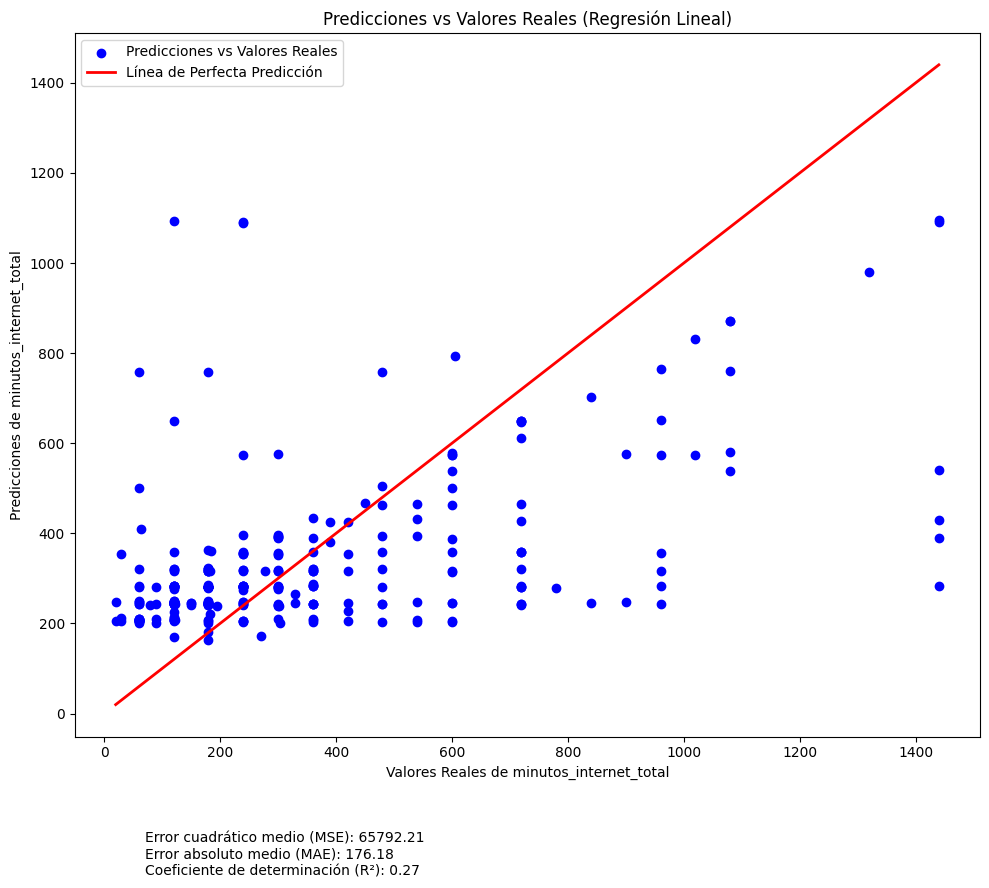

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



# Eliminar filas con valores nulos en 'minutos_internet_total' y excluir 'horas_internet_total' y 'p76horas'
target = 'minutos_internet_total'
df_cleaned = df.dropna(subset=[target])
df_cleaned = df_cleaned.drop(columns=['horas_internet_total', 'p76horas'], errors='ignore')

# Seleccionar las variables predictoras y la variable objetivo
top_variables_updated = ['p80minutos', 'p12minutos', 'p31minutos', 'p50minutos', 'p104_1', 'p80horas']
X = df_cleaned[top_variables_updated].dropna()  # Eliminar filas con NaN en las variables predictoras
y = df_cleaned.loc[X.index, target]  # Alinear y con X después de eliminar NaN

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label="Predicciones vs Valores Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', linewidth=2, label="Línea de Perfecta Predicción")
plt.xlabel("Valores Reales de minutos_internet_total")
plt.ylabel("Predicciones de minutos_internet_total")
plt.title("Predicciones vs Valores Reales (Regresión Lineal)")
plt.legend()

# Mostrar métricas en el gráfico, una debajo de la otra
plt.figtext(0.15, -0.1, f"Error cuadrático medio (MSE): {mse:.2f}\n"
                        f"Error absoluto medio (MAE): {mae:.2f}\n"
                        f"Coeficiente de determinación (R²): {r2:.2f}", ha="left", fontsize=10)

plt.tight_layout()  # Ajustar el diseño para dar espacio a las métricas debajo del gráfico
plt.show()

regreson lineal no es el modelo optimo para trabajar con este dataset, podemos ver que no se encuentra una . procedere a anallizar segun el metodo de Ramdom forest para ver si mi R2 es mejo

Resultados de Random Forest:
Error cuadrático medio (MSE): 72620.79
Error absoluto medio (MAE): 192.14
Coeficiente de determinación (R²): 0.19


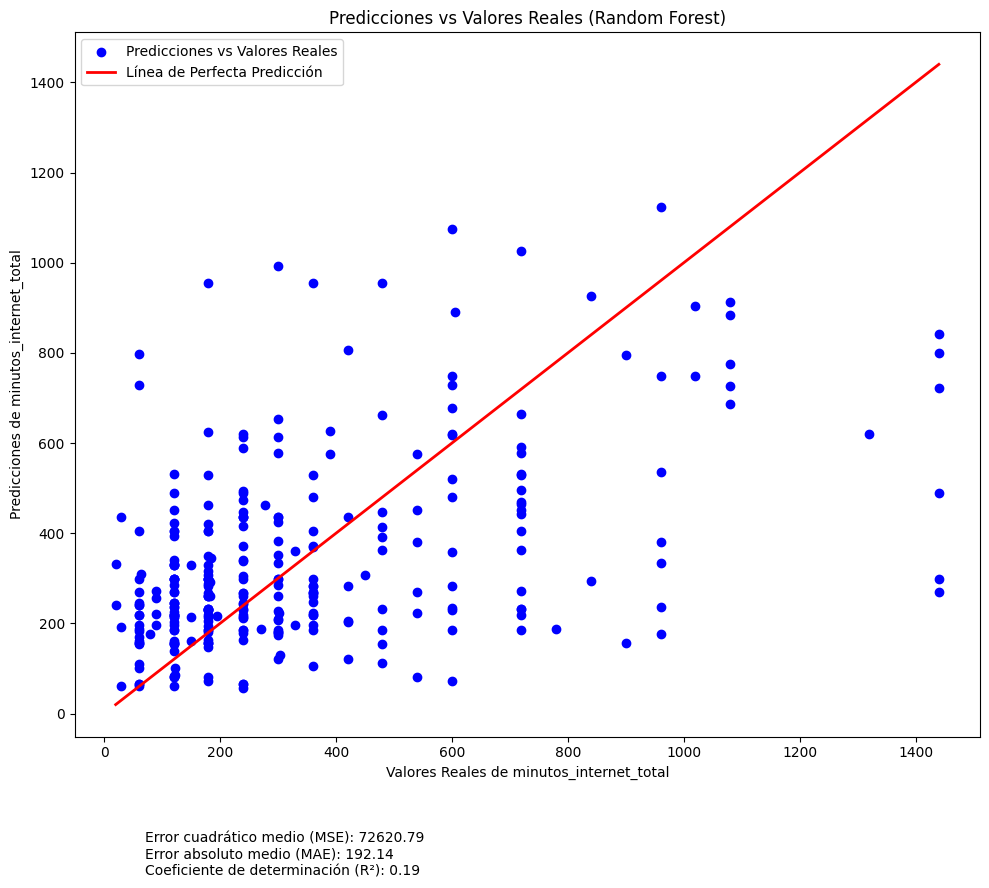

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=0, n_estimators=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas de rendimiento
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar resultados
print("Resultados de Random Forest:")
print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Error absoluto medio (MAE): {mae_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.2f}")

# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rf, color='blue', label="Predicciones vs Valores Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', linewidth=2, label="Línea de Perfecta Predicción")
plt.xlabel("Valores Reales de minutos_internet_total")
plt.ylabel("Predicciones de minutos_internet_total")
plt.title("Predicciones vs Valores Reales (Random Forest)")
plt.legend()

# Mostrar métricas debajo del gráfico, una debajo de la otra
plt.figtext(0.15, -0.1, f"Error cuadrático medio (MSE): {mse_rf:.2f}\n"
                        f"Error absoluto medio (MAE): {mae_rf:.2f}\n"
                        f"Coeficiente de determinación (R²): {r2_rf:.2f}", ha="left", fontsize=10)

plt.tight_layout()  # Ajustar el diseño para dar espacio a las métricas debajo del gráfico
plt.show()

El modelo de Regresión Lineal obtuvo un R2R^2R2 ligeramente superior (0.27 frente a 0.19), lo que indica que, en este caso, captura un poco mejor la variabilidad de los datos que el modelo de Random Forest.
La Regresión Lineal también presenta un MSE y MAE menores, lo cual sugiere que, en este conjunto de datos y con estas variables, el modelo lineal es más efectivo para las predicciones que el Random Forest.

minutos_internet_total y su relación con otras actividades revelan que las variables disponibles explican solo parcialmente el tiempo total dedicado al internet. Las variables predictoras como p80horas y p31minutos muestran correlaciones positivas, mientras que otras como p80minutos sugieren una relación negativa. Sin embargo, el bajo coeficiente de determinación (R2R^2R2) en modelos como Regresión Lineal y Random Forest indica que factores externos o relaciones no lineales, no capturadas por las variables actuales, probablemente influyen significativamente en el tiempo de uso del internet.
Estos resultados podrían interesar a empresas de tecnología y medios digitales, investigadores de comportamiento digital y bienestar social, y departamentos de recursos humanos, quienes buscan comprender los patrones de consumo digital y su interacción con otras actividades. Comprender estos patrones podría ayudar a desarrollar estrategias más informadas para optimizar experiencias digitales, mejorar el balance digital entre usuarios y fomentar prácticas de uso saludable de la tecnología en diferentes contextos.

El Data set seleccionado quizas debera ser evaluado más en profundidad, posiblemente el modelo predictivo apropiado no sea uno lineal sino otra clase de modelo.


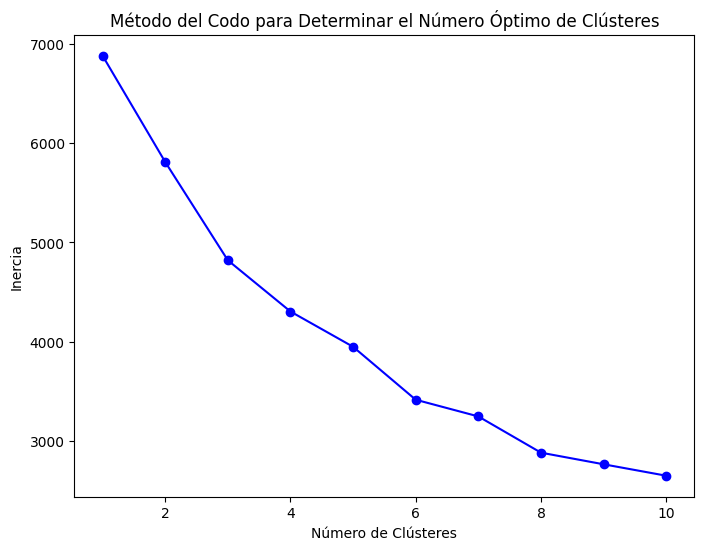

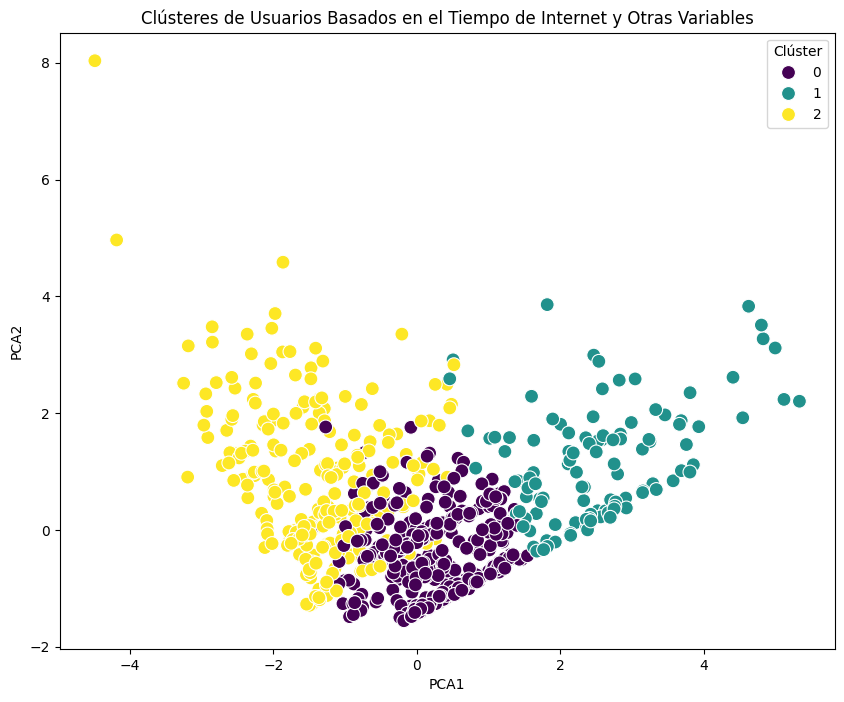

Resumen de cada clúster:


,minutos_internet_total,p80minutos,p12minutos,p31minutos,p50minutos,p104_1,p80horas
Cluster,,,,,,,
0,261.592083,0.722892,3.184165,13.464716,0.077453,0.944923,2.294320
1,862.967480,0.772358,3.260163,14.837398,2.276423,1.056911,12.617886
2,227.681004,21.795699,9.777778,19.111111,14.265233,1.032258,1.297491


In [24]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables para el clustering
# Usaremos algunas de las variables que han mostrado relación con 'minutos_internet_total'
variables_clustering = ['minutos_internet_total', 'p80minutos', 'p12minutos', 'p31minutos', 'p50minutos', 'p104_1', 'p80horas']
df_clustering = df[variables_clustering].dropna()

# Normalización de los datos
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.show()

# Elegir el número de clústeres (por ejemplo, 3, basado en el "codo" de la gráfica)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
df_clustering['Cluster'] = kmeans.fit_predict(df_normalized)

# Visualización de los clústeres en un espacio bidimensional usando PCA para reducir dimensiones
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
df_clustering['PCA1'] = df_pca[:, 0]
df_clustering['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clustering, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clústeres de Usuarios Basados en el Tiempo de Internet y Otras Variables')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Clúster')
plt.show()

# Descripción de cada clúster
cluster_summary = df_clustering.groupby('Cluster')[variables_clustering].mean()
print("Resumen de cada clúster:")
display(cluster_summary)






In [23]:

#Al utilizar esta metodología "del codo" usando K-Means, se puede observar que el número ideal sería 3 clusters


#nos da estos 3 clusters

#Este es el código para analizar los resultados de esta segmentación (cluterning) y su relación con la  edad y también con la región geográfica,

# Asegurarse de que 'sexo' y 'region' estén presentes en df_clustering copiándolos del DataFrame original
df_clustering['sexo'] = df.loc[df_clustering.index, 'sexo']  # Copiar género
df_clustering['region'] = df.loc[df_clustering.index, 'region']  # Copiar región

# Distribución de género en cada clúster
gender_distribution = df_clustering.groupby(['Cluster', 'sexo']).size().unstack()
print("Distribución de Género por Clúster:")
print(gender_distribution)

# Distribución de región en cada clúster
region_distribution = df_clustering.groupby(['Cluster', 'region']).size().unstack()
print("\nDistribución de Región por Clúster:")
print(region_distribution)

Distribución de Género por Clúster:
sexo     Mujer  Varón
Cluster              
0          311    270
1           76     47
2          128    151

Distribución de Región por Clúster:
region   CABA  CENTRO  CUYO  NEA  NOA  PATAGONIA  PBA
Cluster                                              
0         100     104    88   63   75         83   68
1           7      34    21   28   13         15    5
2          25      36    47   41   29         51   50


# Conclusiones sobre la Distribución de Género y Región por Clúster

A partir de la **distribución de género y región por clúster**, podemos extraer algunas conclusiones sobre las características demográficas asociadas con cada grupo de usuarios en términos de su tiempo de uso de internet.

### Distribución por Género
1. **Clúster 0 (Usuarios Moderados)**:
   - Este clúster tiene una distribución de género en la que predominan los **hombres** (270 hombres vs. 311 mujeres).
   - Representa el grupo más grande en términos de cantidad de personas y parece reflejar un uso de internet moderado en ambos géneros, con un leve incremento por parte de las mujeres.

2. **Clúster 1 (Usuarios Intensivos)**:
   - Este clúster es relativamente pequeño, y presenta una **mayor proporción de mujeres (76) que hombres (47)**.
   - Podría indicar que, dentro de los usuarios intensivos de internet, las mujeres son más representativas (un 62% más) en comparación con los hombres en este grupo.

3. **Clúster 2 (Usuarios de Bajo Consumo)**:
   - En este clúster, el número de hombres (151) y mujeres (128) es más equilibrado, pero con una leve predominancia de hombres.
   - Esto sugiere que el grupo de usuarios de bajo consumo de internet no tiene una diferencia de género muy marcada.

### Distribución por Región
1. **Clúster 0 (Usuarios Moderados)**:
   - Los usuarios de esta categoría están distribuidos de manera equilibrada en casi todas las regiones.
   - Las regiones con más usuarios en este clúster son **CABA** y **CENTRO**, mientras que las demás regiones presentan cantidades relativamente similares.
   - Esto sugiere que el uso moderado de internet es una práctica común en la mayoría de las regiones.

2. **Clúster 1 (Usuarios Intensivos)**:
   - Este clúster tiene una representación particularmente alta en las regiones de **CABA**, **CENTRO**, y **CUYO**, con menos presencia en otras regiones.
   - La menor cantidad en regiones como **NOA** y **PATAGONIA** podría reflejar un menor acceso o interés en el uso intensivo de internet en esas áreas.

# - CONCLUSIÓN FINAL DEL PROYECTO

Este proyecto ha proporcionado una comprensión profunda sobre los patrones de uso de internet y las características demográficas asociadas, explorando inicialmente la capacidad predictiva de modelos como **Regresión Lineal** y **Random Forest**, y complementando el análisis con un enfoque de **segmentación mediante clústeres**.

### Resumen de Hallazgos
Los modelos predictivos iniciales, como la regresión lineal y Random Forest, mostraron limitaciones al intentar predecir el tiempo total de internet (`minutos_internet_total`) a partir de las variables disponibles, indicando que los factores incluidos en el dataset no capturan por completo la variabilidad en el uso de internet. Esto quedó reflejado en los bajos valores de \( R^2 \) obtenidos, lo que sugería la necesidad de explorar otras metodologías para extraer información útil de los datos.

La aplicación de un análisis de **clústeres** resultó ser una estrategia más efectiva. A través del algoritmo de K-Means, se lograron identificar tres grupos principales de usuarios: **usuarios intensivos**, **usuarios moderados** y **usuarios de bajo consumo**. Esta segmentación permitió observar patrones distintivos de comportamiento en cuanto al tiempo de uso de internet, así como la distribución de estos clústeres en función de características demográficas como **género** y **región geográfica**.

### Implicaciones y Recomendaciones
El enfoque de segmentación abre la puerta a estrategias de intervención y personalización para cada grupo:
- **Usuarios Intensivos**: Estos usuarios, principalmente en áreas urbanas, podrían beneficiarse de programas de bienestar digital que promuevan un uso equilibrado del internet.
- **Usuarios Moderados**: Representan un perfil de uso equilibrado y podrían ser el objetivo de iniciativas que optimicen su experiencia en internet sin promover un uso excesivo.
- **Usuarios de Bajo Consumo**: Este grupo, distribuido homogéneamente entre las regiones, puede necesitar mayor acceso a recursos tecnológicos y programas que fomenten la conectividad.

### Conclusión General
El análisis de clústeres ha demostrado ser una metodología poderosa para comprender los patrones de uso de internet y segmentar a los usuarios en función de su comportamiento digital. Esta metodología no solo proporciona insights más detallados que los modelos predictivos, sino que también permite diseñar estrategias adaptadas a cada grupo de usuarios, ofreciendo una base sólida para futuros estudios y programas de intervención. Para estudios futuros, se recomienda incorporar variables contextuales adicionales (como factores socioeconómicos) que podrían enriquecer aún más el análisis y mejorar la precisión de las segmentaciones y predicciones. Este proyecto, en resumen, destaca la importancia de adaptar las metodologías a los objetivos específicos y a la naturaleza de los datos, demostrando que el análisis de clústeres es una herramienta valiosa para entender y caracterizar patrones de uso en entornos complejos como el de los hábitos de internet.
tiene menú contextual